# libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
plt.style.use('ggplot')

In [2]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\quay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\quay\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\quay\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\quay\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\quay\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# read csv to dataframe

In [3]:
filepath = "../data/raw/refined.csv"

In [4]:
filepath2 = "../data/raw/refined_amen.csv"

In [5]:
df = pd.read_csv(filepath)

In [6]:
df2 = pd.read_csv(filepath2)

In [7]:
# unique hotels in each df
df['Name'].nunique(), df2['Name'].nunique()

(192, 195)

In [8]:
# check for df not in df2
names_not_in_df2 = ~df['Name'].isin(df2['Name'])
names_not_present = df['Name'][names_not_in_df2].unique()
print(names_not_present)

['Hotel Mi' 'Marina Bay Sands'
 'PARKROYAL COLLECTION Marina Bay, Singapore'
 'The Fullerton Hotel Singapore' 'D’Resort @ Downtown East'
 'One Farrer Hotel']


In [9]:
df.shape

(51709, 10)

In [10]:
df.describe()

,Average_rating,Rating
count,51699.000000,51709.000000
mean,4.039159,4.133284
std,0.497547,1.134692
min,2.500000,1.000000
25%,3.500000,4.000000
50%,4.000000,5.000000
75%,4.500000,5.000000
max,5.000000,5.000000


# Data cleaning

In [11]:
# rename columns
df.columns = [x.replace(' ', '_') for x in df.columns]
df.columns = [x.lower() for x in df.columns]

In [12]:
# check for na 
print(df.isna().sum())

name                     0
review_count            10
average_rating          10
overall_experience       0
rating                   0
title                   30
comment_content          0
date                    10
hotel_class           2730
good_to_know             0
dtype: int64


# Data wrangling

### create index

In [13]:
df.insert(0, 'index', df.index + 1)

### remove non english characters

In [14]:
df['comment_content'] = df['comment_content'].apply(lambda x: x.encode('ascii', 'ignore').decode('utf-8'))

In [15]:
# remove non english rows
# df = df[df.comment_content.map(lambda x: x.isascii())]

In [16]:
df.head()

,index,name,review_count,average_rating,overall_experience,rating,title,comment_content,date,hotel_class,good_to_know
0,1,M Social Singapore,"2,042 reviews",4.0,"[4.2, 4.5, 4.2, 4.0]",5,"""Exceptional Experience at M Social Hotel”",I had a similarly extraordinary experience dur...,Date of stay: September 2023,4.0 of 5 stars,"['', 'Boutique', 'Trendy', 'English, Chinese, ..."
1,2,M Social Singapore,"2,042 reviews",4.0,"[4.2, 4.5, 4.2, 4.0]",5,Armando at the front desk,Armando of the front desk was kind enough to l...,Date of stay: September 2023,4.0 of 5 stars,"['', 'Boutique', 'Trendy', 'English, Chinese, ..."
2,3,M Social Singapore,"2,042 reviews",4.0,"[4.2, 4.5, 4.2, 4.0]",5,The best stay experience in Singapore,We spend two wonderful nights at M Social Sing...,Date of stay: September 2023,4.0 of 5 stars,"['', 'Boutique', 'Trendy', 'English, Chinese, ..."
3,4,M Social Singapore,"2,042 reviews",4.0,"[4.2, 4.5, 4.2, 4.0]",5,A much needed STAYCATION,I have been frequenting M Social every time I ...,Date of stay: September 2023,4.0 of 5 stars,"['', 'Boutique', 'Trendy', 'English, Chinese, ..."
4,5,M Social Singapore,"2,042 reviews",4.0,"[4.2, 4.5, 4.2, 4.0]",5,Super location super staff .,Excellent location great hotel... especially A...,Date of stay: September 2023,4.0 of 5 stars,"['', 'Boutique', 'Trendy', 'English, Chinese, ..."


### create new columns for overall experience

In [17]:
df['overall_experience'] = df['overall_experience'].str.strip('[]')
df['location'] = df['overall_experience'].str.split(',').str.get(0)
df['cleanliness'] = df['overall_experience'].str.split(',').str.get(1)
df['service'] = df['overall_experience'].str.split(',').str.get(2)
df['value'] = df['overall_experience'].str.split(',').str.get(3)

In [18]:
df.head()

,index,name,review_count,average_rating,overall_experience,rating,title,comment_content,date,hotel_class,good_to_know,location,cleanliness,service,value
0,1,M Social Singapore,"2,042 reviews",4.0,"4.2, 4.5, 4.2, 4.0",5,"""Exceptional Experience at M Social Hotel”",I had a similarly extraordinary experience dur...,Date of stay: September 2023,4.0 of 5 stars,"['', 'Boutique', 'Trendy', 'English, Chinese, ...",4.2,4.5,4.2,4.0
1,2,M Social Singapore,"2,042 reviews",4.0,"4.2, 4.5, 4.2, 4.0",5,Armando at the front desk,Armando of the front desk was kind enough to l...,Date of stay: September 2023,4.0 of 5 stars,"['', 'Boutique', 'Trendy', 'English, Chinese, ...",4.2,4.5,4.2,4.0
2,3,M Social Singapore,"2,042 reviews",4.0,"4.2, 4.5, 4.2, 4.0",5,The best stay experience in Singapore,We spend two wonderful nights at M Social Sing...,Date of stay: September 2023,4.0 of 5 stars,"['', 'Boutique', 'Trendy', 'English, Chinese, ...",4.2,4.5,4.2,4.0
3,4,M Social Singapore,"2,042 reviews",4.0,"4.2, 4.5, 4.2, 4.0",5,A much needed STAYCATION,I have been frequenting M Social every time I ...,Date of stay: September 2023,4.0 of 5 stars,"['', 'Boutique', 'Trendy', 'English, Chinese, ...",4.2,4.5,4.2,4.0
4,5,M Social Singapore,"2,042 reviews",4.0,"4.2, 4.5, 4.2, 4.0",5,Super location super staff .,Excellent location great hotel... especially A...,Date of stay: September 2023,4.0 of 5 stars,"['', 'Boutique', 'Trendy', 'English, Chinese, ...",4.2,4.5,4.2,4.0


In [19]:
# convert to float
df['location'] = pd.to_numeric(df['location'])
df['cleanliness'] = pd.to_numeric(df['cleanliness'])
df['service'] = pd.to_numeric(df['service'])
df['value'] = pd.to_numeric(df['value'])

### change x.x stars out of x.x to x.x for hotel_class

In [20]:
df['hotel_class'] = df['hotel_class'].str.extract('(\d+\.\d+)', expand=False).astype(float)

In [21]:
df.head()


,index,name,review_count,average_rating,overall_experience,rating,title,comment_content,date,hotel_class,good_to_know,location,cleanliness,service,value
0,1,M Social Singapore,"2,042 reviews",4.0,"4.2, 4.5, 4.2, 4.0",5,"""Exceptional Experience at M Social Hotel”",I had a similarly extraordinary experience dur...,Date of stay: September 2023,4.0,"['', 'Boutique', 'Trendy', 'English, Chinese, ...",4.2,4.5,4.2,4.0
1,2,M Social Singapore,"2,042 reviews",4.0,"4.2, 4.5, 4.2, 4.0",5,Armando at the front desk,Armando of the front desk was kind enough to l...,Date of stay: September 2023,4.0,"['', 'Boutique', 'Trendy', 'English, Chinese, ...",4.2,4.5,4.2,4.0
2,3,M Social Singapore,"2,042 reviews",4.0,"4.2, 4.5, 4.2, 4.0",5,The best stay experience in Singapore,We spend two wonderful nights at M Social Sing...,Date of stay: September 2023,4.0,"['', 'Boutique', 'Trendy', 'English, Chinese, ...",4.2,4.5,4.2,4.0
3,4,M Social Singapore,"2,042 reviews",4.0,"4.2, 4.5, 4.2, 4.0",5,A much needed STAYCATION,I have been frequenting M Social every time I ...,Date of stay: September 2023,4.0,"['', 'Boutique', 'Trendy', 'English, Chinese, ...",4.2,4.5,4.2,4.0
4,5,M Social Singapore,"2,042 reviews",4.0,"4.2, 4.5, 4.2, 4.0",5,Super location super staff .,Excellent location great hotel... especially A...,Date of stay: September 2023,4.0,"['', 'Boutique', 'Trendy', 'English, Chinese, ...",4.2,4.5,4.2,4.0


In [22]:
df.dtypes

index                   int64
name                   object
review_count           object
average_rating        float64
overall_experience     object
rating                  int64
title                  object
comment_content        object
date                   object
hotel_class           float64
good_to_know           object
location              float64
cleanliness           float64
service               float64
value                 float64
dtype: object

In [23]:
df.dtypes

index                   int64
name                   object
review_count           object
average_rating        float64
overall_experience     object
rating                  int64
title                  object
comment_content        object
date                   object
hotel_class           float64
good_to_know           object
location              float64
cleanliness           float64
service               float64
value                 float64
dtype: object

In [24]:
print(df.isna().sum())

index                    0
name                     0
review_count            10
average_rating          10
overall_experience       0
rating                   0
title                   30
comment_content          0
date                    10
hotel_class           2730
good_to_know             0
location               210
cleanliness            210
service                210
value                  360
dtype: int64


In [25]:
# hotels with NA experience ratings
value_na = df[df['value'].isna()]
value_na['name'].unique()

array(['Pan Pacific Orchard', 'Hotel 81 Gold',
       'Holiday Inn Express & Suites Singapore Novena, an IHG Hotel',
       'Mandarin Oriental, Singapore', 'K2 Guest House', 'Spacepod@SG'],
      dtype=object)

In [26]:
# hotels with NA hotel class
value_na = df[df['hotel_class'].isna()]
value_na['name'].unique()

array(['Hotel Mi', 'ST Signature Jalan Besar', 'Hotel 81 Gold',
       'South East Asia Hotel', 'Hotel Bencoolen - Hong Kong Street',
       'Holiday Inn Express & Suites Singapore Novena, an IHG Hotel',
       'Yaju Hotel', 'Andaz Singapore', 'Galaxy Pods @ Chinatown',
       'The Snooze Hotel Marine Parade', 'MET A Space Pod @ Arab Street',
       'Republic of Singapore Yacht Club',
       'The Sleepy Kiwi Backpackers Hostel'], dtype=object)

# EDA

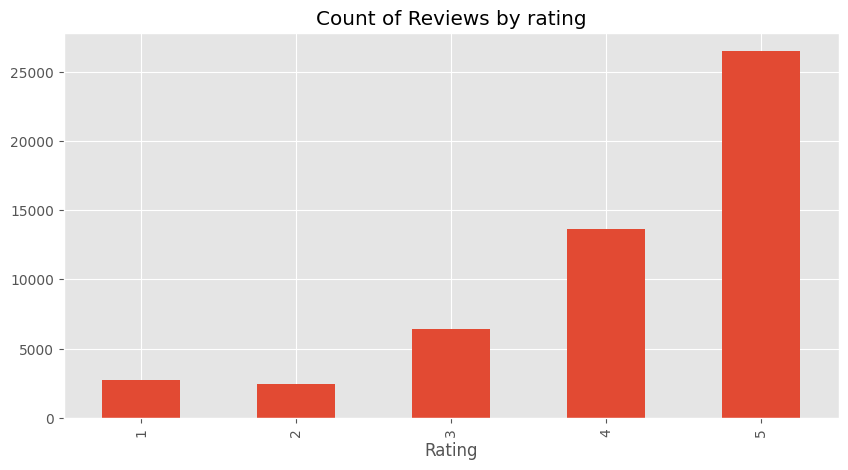

In [27]:
ax = df['rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by rating',
          figsize=(10, 5))
ax.set_xlabel('Rating')
plt.show()

In [28]:
example = df['comment_content'][60]
print(example)

Met a staff named Shan Ru who was very kind and greeted me on my way to the room. She also kindly provided additional coffee packets to me when I requested. Very good and friendly service all around the hotel.


In [29]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Met', 'a', 'staff', 'named', 'Shan', 'Ru', 'who', 'was', 'very', 'kind']

In [30]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Met', 'NNP'),
 ('a', 'DT'),
 ('staff', 'NN'),
 ('named', 'VBN'),
 ('Shan', 'NNP'),
 ('Ru', 'NNP'),
 ('who', 'WP'),
 ('was', 'VBD'),
 ('very', 'RB'),
 ('kind', 'NN')]

https://www.guru99.com/pos-tagging-chunking-nltk.html

In [31]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  Met/NNP
  a/DT
  staff/NN
  named/VBN
  (PERSON Shan/NNP Ru/NNP)
  who/WP
  was/VBD
  very/RB
  kind/NN
  and/CC
  greeted/VBD
  me/PRP
  on/IN
  my/PRP$
  way/NN
  to/TO
  the/DT
  room/NN
  ./.
  She/PRP
  also/RB
  kindly/RB
  provided/VBD
  additional/JJ
  coffee/NN
  packets/NNS
  to/TO
  me/PRP
  when/WRB
  I/PRP
  requested/VBD
  ./.
  Very/RB
  good/JJ
  and/CC
  friendly/JJ
  service/NN
  all/DT
  around/IN
  the/DT
  hotel/NN
  ./.)


# VADER

In [32]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [33]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.675, 'pos': 0.325, 'compound': 0.9424}

In [34]:
# Run the polarity score on the entire dataset
res = {}
for i, row in df.iterrows():
    text = row['comment_content']
    myid = row['index']
    res[myid] = sia.polarity_scores(text)

In [35]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'index'})
vaders = vaders.merge(df, how='left')

In [36]:
vaders

,index,neg,neu,pos,compound,name,review_count,average_rating,overall_experience,rating,title,comment_content,date,hotel_class,good_to_know,location,cleanliness,service,value
0,1,0.000,0.790,0.210,0.9894,M Social Singapore,"2,042 reviews",4.0,"4.2, 4.5, 4.2, 4.0",5,"""Exceptional Experience at M Social Hotel”",I had a similarly extraordinary experience dur...,Date of stay: September 2023,4.0,"['', 'Boutique', 'Trendy', 'English, Chinese, ...",4.2,4.5,4.2,4.0
1,2,0.037,0.799,0.164,0.8689,M Social Singapore,"2,042 reviews",4.0,"4.2, 4.5, 4.2, 4.0",5,Armando at the front desk,Armando of the front desk was kind enough to l...,Date of stay: September 2023,4.0,"['', 'Boutique', 'Trendy', 'English, Chinese, ...",4.2,4.5,4.2,4.0
2,3,0.000,0.703,0.297,0.9893,M Social Singapore,"2,042 reviews",4.0,"4.2, 4.5, 4.2, 4.0",5,The best stay experience in Singapore,We spend two wonderful nights at M Social Sing...,Date of stay: September 2023,4.0,"['', 'Boutique', 'Trendy', 'English, Chinese, ...",4.2,4.5,4.2,4.0
3,4,0.000,0.719,0.281,0.9988,M Social Singapore,"2,042 reviews",4.0,"4.2, 4.5, 4.2, 4.0",5,A much needed STAYCATION,I have been frequenting M Social every time I ...,Date of stay: September 2023,4.0,"['', 'Boutique', 'Trendy', 'English, Chinese, ...",4.2,4.5,4.2,4.0
4,5,0.000,0.820,0.180,0.7003,M Social Singapore,"2,042 reviews",4.0,"4.2, 4.5, 4.2, 4.0",5,Super location super staff .,Excellent location great hotel... especially A...,Date of stay: September 2023,4.0,"['', 'Boutique', 'Trendy', 'English, Chinese, ...",4.2,4.5,4.2,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51704,51705,0.017,0.801,0.182,0.9747,Spacepod@SG,20 reviews,3.5,"1.0, 3.0, 3.0",5,Easy comfortable cheap,I booked with this place to experience a capsu...,Date of stay: June 2019,2.0,"['', 'Budget', 'English, Chinese']",1.0,3.0,3.0,NaN
51705,51706,0.000,0.734,0.266,0.9635,Spacepod@SG,20 reviews,3.5,"1.0, 3.0, 3.0",5,Awesome place to stay!,It's my first time to stay in capsule hotel an...,Date of stay: November 2018,2.0,"['', 'Budget', 'English, Chinese']",1.0,3.0,3.0,NaN
51706,51707,0.000,0.638,0.362,0.9876,Spacepod@SG,20 reviews,3.5,"1.0, 3.0, 3.0",5,Worth every pennies,The receptionist ladies (Rachel and Joey) were...,Date of stay: November 2018,2.0,"['', 'Budget', 'English, Chinese']",1.0,3.0,3.0,NaN
51707,51708,0.047,0.727,0.227,0.9756,Spacepod@SG,20 reviews,3.5,"1.0, 3.0, 3.0",3,Unique yet weird place to stay,Okay. What was my consideration to stay here? ...,Date of stay: October 2018,2.0,"['', 'Budget', 'English, Chinese']",1.0,3.0,3.0,NaN


# vader reusults

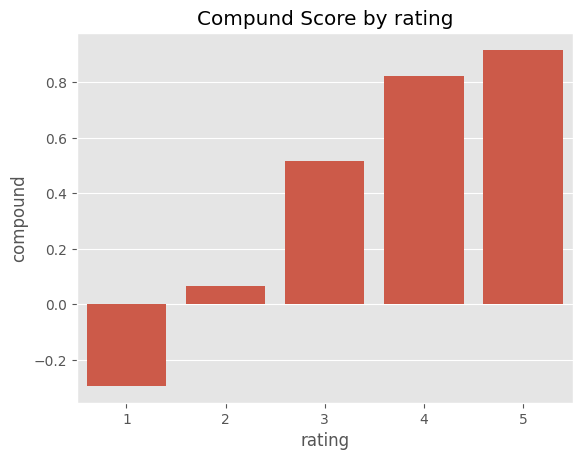

In [37]:
ax = sns.barplot(data=vaders, x='rating', y='compound', errorbar=None)
ax.set_title('Compund Score by rating')
plt.show()

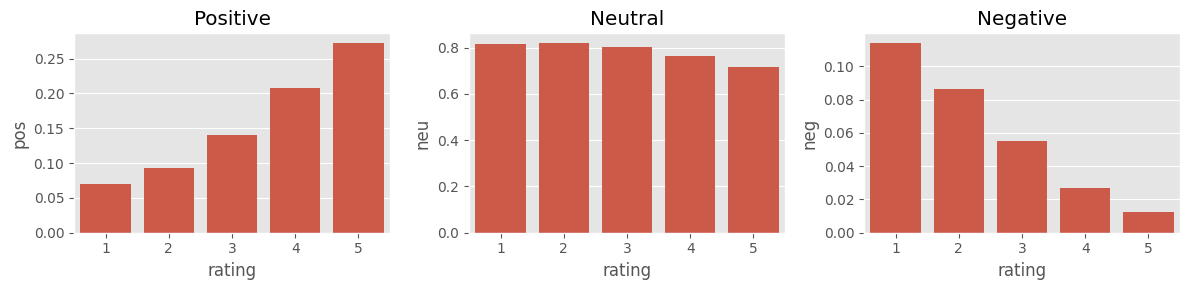

In [38]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='rating', y='pos', ax=axs[0], errorbar=None)
sns.barplot(data=vaders, x='rating', y='neu', ax=axs[1], errorbar=None)
sns.barplot(data=vaders, x='rating', y='neg', ax=axs[2], errorbar=None)
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

this shows that vader is valuble in having this connection betwwen the sentiment score of the text and the rating

# however, vader does not pick up on sarcasm, we have transformer deep learning models that can pick up those context

In [ ]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
# VADER 
print(example)
sia.polarity_scores(example)

In [ ]:
# Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

In [ ]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}

for i, row in df.iterrows():
    try:
        text = row['comment_content']
        
        # Perform VADER sentiment analysis
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        
        # Perform sentiment analysis using 'polarity_scores_roberta' function
        # You should define this function separately if you haven't already
        roberta_result = polarity_scores_roberta(text) 
        
        # Combine the results from both methods into one dictionary
        both = {**vader_result_rename, **roberta_result}
        res[i] = both
    except RuntimeError:
        print(f'Broke for id {i}')

# Display the results
print(res)

In [ ]:
df.iloc[[162]]

In [ ]:
pd.set_option('display.max_colwidth', None)